## W1D3 Project Questions

In [3]:
# load data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, requests
from matplotlib import colors
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
from numpy import pi
from copy import copy
import seaborn as sns

# @title Data loading
data = pd.read_csv("data01_direction4priors.csv")
data.head()

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id
0,1,0.000000,NaN,225,0.12,-1.749685,-1.785666,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
1,2,2.730730,NaN,225,0.12,-1.819693,-1.714269,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
2,3,4.913950,NaN,235,0.06,-1.562674,-1.951422,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
3,4,6.997296,NaN,225,0.06,-1.601388,-1.919781,NaN,NaN,10,225,1,data01_direction4priors,11,1,1
4,5,9.097130,NaN,215,0.24,-1.639461,-1.887371,NaN,NaN,10,225,1,data01_direction4priors,11,1,1


In [4]:
subject_id_set = data['subject_id'].unique()
n_subjects = len(subject_id_set)

prior_std_set = data['prior_std'].unique()
n_prior_std = len(prior_std_set)

coherence_set = data['motion_coherence'].unique()
n_coherence = len(coherence_set)

In [5]:
# convert_xy_to_degree function
def convert_xy_to_degree(x, y):
    degree = np.degrees(np.arctan2(x, y))
    
    # degree = math.atan2(x,y)/math.pi*180
    # print(degree)

    if degree < 0 : degree = -degree + 180
    
    return degree

In [44]:
# prepare data

# 1. calculate the error
df = data.copy()
df['estimate_direction'] = [ convert_xy_to_degree(x, y) for x, y in zip(data['estimate_x'], data['estimate_y'])]
df['error'] = abs(df['motion_direction'] - df['estimate_direction'])

# 2. choose the columns to use
dff = df[['subject_id', 'trial_index', 'response_arrow_start_angle', 'motion_direction', 'motion_coherence', 'reaction_time', 'prior_std', 'session_id', 'run_id', 'error']]
dff = dff.dropna(subset=['error'])

In [7]:
df[df['error'].isna()]

,trial_index,trial_time,response_arrow_start_angle,motion_direction,motion_coherence,estimate_x,estimate_y,reaction_time,raw_response_time,prior_std,prior_mean,subject_id,experiment_name,experiment_id,session_id,run_id,estimate_direction,error
30043,146,345.982432,NaN,305,0.06,NaN,NaN,NaN,NaN,80,225,4,data01_direction4priors,11,5,20,NaN,NaN
30651,188,440.006019,NaN,275,0.06,NaN,NaN,NaN,NaN,80,225,4,data01_direction4priors,11,5,23,NaN,NaN
66604,1,0.000000,145.0,225,0.06,NaN,NaN,NaN,NaN,20,225,10,data01_direction4priors,12,3,12,NaN,NaN


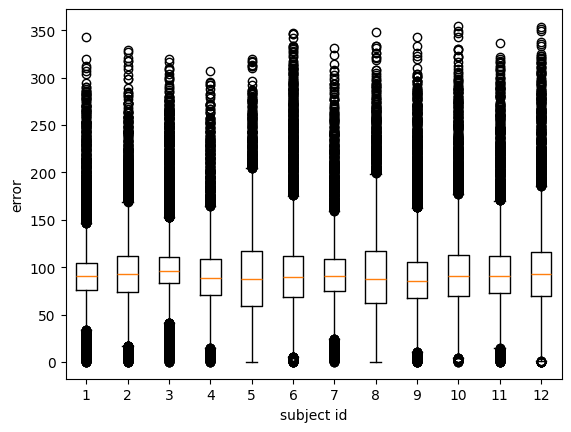

In [8]:
fig, ax = plt.subplots()

ax.boxplot([np.array(dff[dff['subject_id'] == subject][['error']]).flatten() for subject in subject_id_set])
# ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('subject id')
ax.set_ylabel('error')

plt.show()

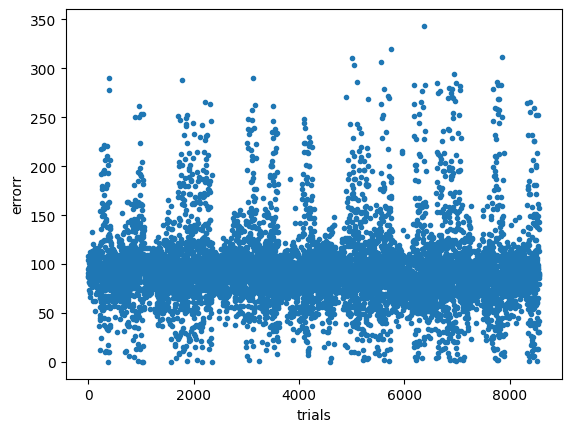

In [9]:
dff_1 = dff[dff['subject_id'] == 1]
plt.plot(dff_1['error'], 'o', markersize=3)
# plt.xticks(range(len(dff_1['trial_index']), 2000))
plt.xlabel('trials')
plt.ylabel('errorr')
plt.show()

### Q1. What is more important for accuracy: the coherence or the prior? We will look at different combinations of coherence and priors to better understand what weight that have in the decision.
Steps:
1. Bin the trials for each type of prior and each type of coherence
2. Calculate error in each type (coherence x prior)


In [10]:
dff_1[212:214]

,subject_id,trial_index,response_arrow_start_angle,motion_direction,motion_coherence,reaction_time,prior_std,session_id,error
212,1,213,NaN,225,0.24,NaN,10,1,98.604523
213,1,1,NaN,255,0.06,NaN,80,1,36.518886


#### 1) Prior

In [11]:
prior_std_set.sort()

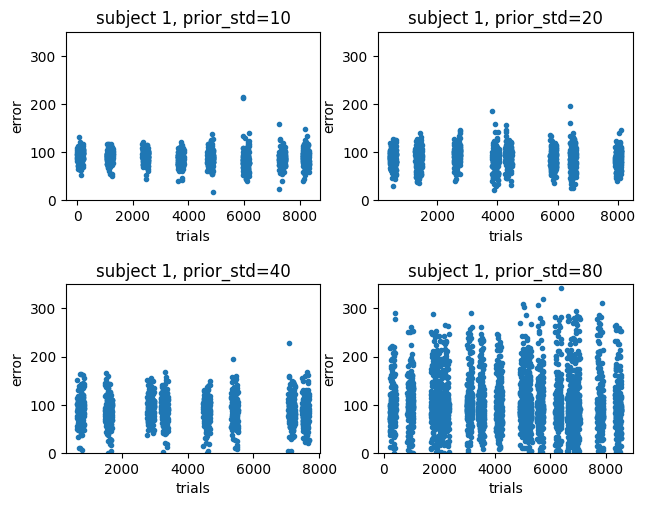

In [12]:
subject_id = 1
dff_s = dff[dff['subject_id'] == subject_id]
fig, axes = plt.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

for idx, prior_std in enumerate(prior_std_set):
    # plt.subplot(2,2,idx+1)
    axes[int(idx/2),int(idx%2)].plot(dff_s[dff_s['prior_std'] == prior_std]['error'], 'o', markersize=3)
    axes[int(idx/2),int(idx%2)].set_xlabel('trials')
    axes[int(idx/2),int(idx%2)].set_ylabel('error')
    axes[int(idx/2),int(idx%2)].set_title(f'subject {subject_id}, prior_std={prior_std}')
    # axes[int(idx/2),int(idx%2)].set_xlim(0, len(dff_1))
    axes[int(idx/2),int(idx%2)].set_ylim(0, 350)
plt.show()

Text(0, 0.5, 'n_error')

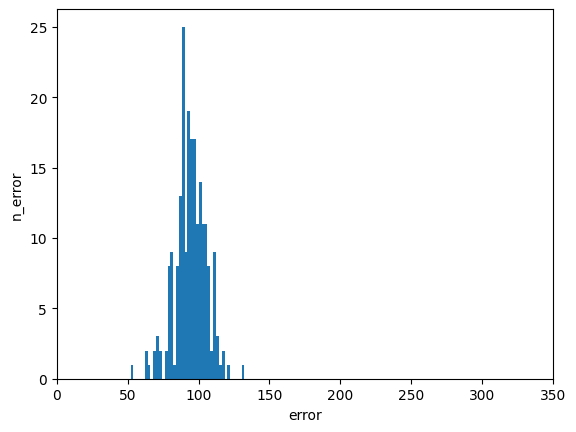

In [130]:
# session 1, prior 10
plt.hist(dff_q1[:213]['error'], bins=40)
plt.xlim(0, 350)
plt.xlabel('error')
plt.ylabel('n_error')

Text(0, 0.5, 'n_error')

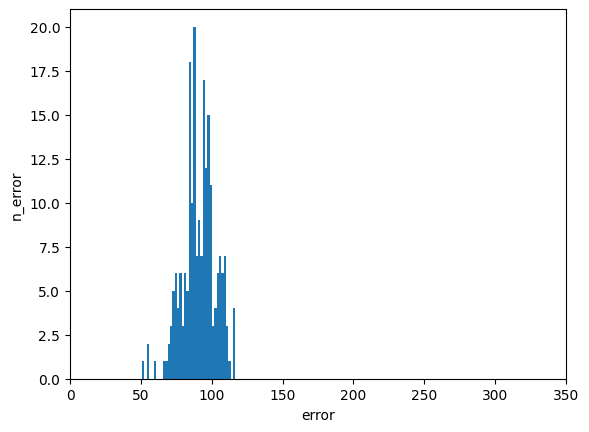

In [131]:
# session 6, prior 10
plt.hist(dff_q1[1065:1065+213]['error'], bins=40)
plt.xlim(0, 350)
plt.xlabel('error')
plt.ylabel('n_error')

Text(0, 0.5, 'n_error')

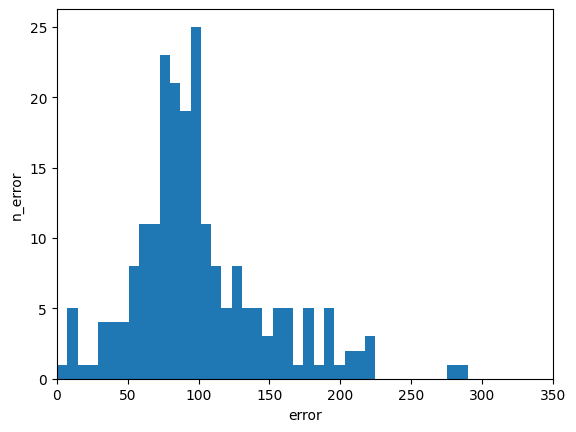

In [133]:
# session 2, prior 80
plt.hist(dff_q1[213:213+215]['error'], bins=40)
plt.xlim(0, 350)
plt.xlabel('error')
plt.ylabel('n_error')

In [41]:
dff_q1[dff_q1['subject_id']==1].groupby(['subject_id','prior_std'])[['error']].agg(['mean', 'median', 'var']).reset_index()

subject_id prior_std       error                        
                              mean     median          var
0          1        10   88.900899  89.125462   208.181531
1          1        20   88.051041  89.455692   375.382693
2          1        40   88.611807  89.115120   688.211783
3          1        80  102.554176  92.718324  2659.702755

In [42]:
dff_q1[dff_q1['subject_id']==1].groupby(['subject_id','prior_std', 'motion_coherence'])[['error']].agg(['mean', 'median', 'var']).reset_index()

subject_id prior_std motion_coherence       error                        
                                                mean     median          var
0           1        10             0.06   87.205969  87.175036   264.647868
1           1        10             0.12   89.562527  89.455692   170.057281
2           1        10             0.24   92.628916  92.535406    94.806273
3           1        20             0.06   85.835635  85.704705   490.552008
4           1        20             0.12   89.688976  91.111796   307.374836
5           1        20             0.24   91.560074  92.042269   118.536396
6           1        40             0.06   85.937908  85.636636   956.927414
7           1        40             0.12   90.791672  90.364133   512.535857
8           1        40             0.24   92.095639  91.031458   187.506218
9           1        80             0.06  100.760977  92.192682  3197.969220
10          1        80             0.12  102.778205  93.069965  2253.525447
11          1        80             0.24  107.291860  92.413861  1900.677405

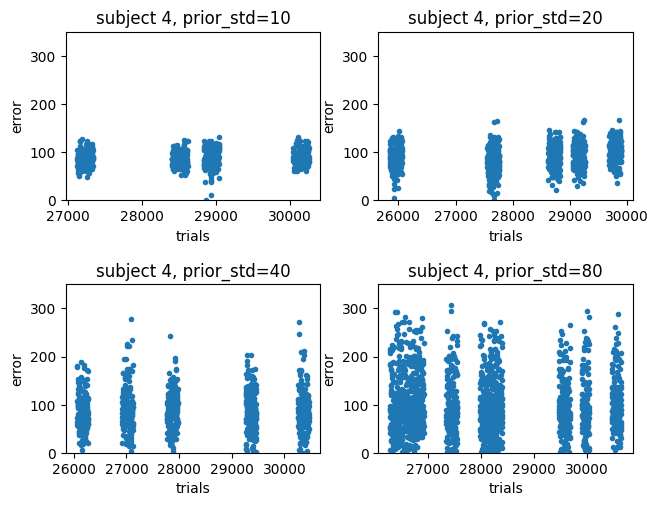

In [13]:
subject_id = 4
dff_s = dff[dff['subject_id'] == subject_id]
fig, axes = plt.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

for idx, prior_std in enumerate(prior_std_set):
    # plt.subplot(2,2,idx+1)
    axes[int(idx/2),int(idx%2)].plot(dff_s[dff_s['prior_std'] == prior_std]['error'], 'o', markersize=3)
    axes[int(idx/2),int(idx%2)].set_xlabel('trials')
    axes[int(idx/2),int(idx%2)].set_ylabel('error')
    axes[int(idx/2),int(idx%2)].set_title(f'subject {subject_id}, prior_std={prior_std}')
    # axes[int(idx/2),int(idx%2)].set_xlim(0, len(dff_1))
    axes[int(idx/2),int(idx%2)].set_ylim(0, 350)
plt.show()

In [81]:
# prior 10
dff_q1[dff_q1['prior_std'] == prior_std_set[0]].groupby(['prior_std','subject_id'])[['error']].agg(['mean', 'median', 'var']).reset_index()

prior_std subject_id      error                        
                              mean     median          var
0         10          1  88.900899  89.125462   208.181531
1         10          2  91.859267  90.288368   175.971118
2         10          3  94.962968  94.613146   141.910499
3         10          4  87.826127  87.163861   257.108268
4         10          5  88.391434  88.623017  1740.268992
5         10          6  88.119137  88.784419   578.608049
6         10          7  91.658281  90.288368   251.339822
7         10          8  87.178117  86.539355  1377.385193
8         10          9  82.473693  82.883875   394.379875
9         10         10  90.498579  92.288368   568.485791
10        10         11  87.827592  87.823289   314.881419
11        10         12  95.093299  94.788368   336.161300

In [82]:
# prior 20
dff_q1[dff_q1['prior_std'] == prior_std_set[1]].groupby(['prior_std','subject_id'])[['error']].agg(['mean', 'median', 'var']).reset_index()

prior_std subject_id      error                        
                              mean     median          var
0         20          1  88.051041  89.455692   375.382693
1         20          2  95.368961  94.872030   505.404422
2         20          3  96.487445  96.141236   344.934410
3         20          4  91.785821  92.374004   607.682554
4         20          5  90.806454  87.449770  2050.681425
5         20          6  88.524539  89.549226   864.480018
6         20          7  91.225887  90.288368   672.605983
7         20          8  83.749119  83.206680  1238.008565
8         20          9  82.658695  83.000485   612.732741
9         20         10  87.612821  87.821578   865.272581
10        20         11  89.989816  89.615120   655.091990
11        20         12  92.283447  93.476707   901.275723

In [83]:
# prior 40
dff_q1[dff_q1['prior_std'] == prior_std_set[2]].groupby(['prior_std','subject_id'])[['error']].agg(['mean', 'median', 'var']).reset_index()

prior_std subject_id      error                        
                              mean     median          var
0         40          1  88.611807  89.115120   688.211783
1         40          2  88.946618  89.455692  1304.007772
2         40          3  96.961316  95.758833   866.440830
3         40          4  89.344236  86.117095  1504.163013
4         40          5  86.792186  82.786394  1972.664256
5         40          6  87.570264  86.296264  1521.762269
6         40          7  87.171312  86.537381  1173.744433
7         40          8  91.222621  89.042316  2109.379688
8         40          9  87.431012  85.667810  1425.814076
9         40         10  89.151350  87.226246  1912.748045
10        40         11  92.326548  91.665835  1529.040603
11        40         12  89.930035  88.161097  1907.711208

In [84]:
# prior 80
dff_q1[dff_q1['prior_std'] == prior_std_set[3]].groupby(['prior_std','subject_id'])[['error']].agg(['mean', 'median', 'var']).reset_index()

prior_std subject_id       error                        
                               mean     median          var
0         80          1  102.554176  92.718324  2659.702755
1         80          2  100.316756  92.374004  3569.418872
2         80          3  108.942142  96.124991  2927.463048
3         80          4   98.145554  85.704705  3289.244528
4         80          5   99.818145  89.043303  3586.873152
5         80          6  105.606455  91.043303  4526.939644
6         80          7  102.413490  92.374004  3127.657693
7         80          8  105.406934  92.412084  4509.206422
8         80          9  103.089030  91.291831  3617.427368
9         80         10  105.799304  93.412389  4291.088743
10        80         11  107.853045  94.912874  3854.942329
11        80         12  106.045608  93.015577  4787.404955

#### 2) Coherence

In [14]:
coherence_set.sort()

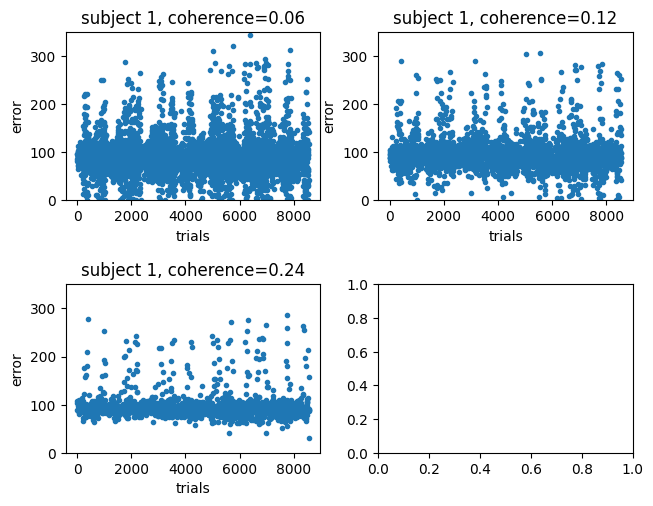

In [15]:
subject_id = 1
dff_s = dff[dff['subject_id'] == subject_id]
fig, axes = plt.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

for idx, coherence in enumerate(coherence_set):
    # plt.subplot(2,2,idx+1)
    axes[int(idx/2),int(idx%2)].plot(dff_s[dff_s['motion_coherence'] == coherence]['error'], 'o', markersize=3)
    axes[int(idx/2),int(idx%2)].set_xlabel('trials')
    axes[int(idx/2),int(idx%2)].set_ylabel('error')
    axes[int(idx/2),int(idx%2)].set_title(f'subject {subject_id}, coherence={coherence}')
    axes[int(idx/2),int(idx%2)].set_ylim(0, 350)

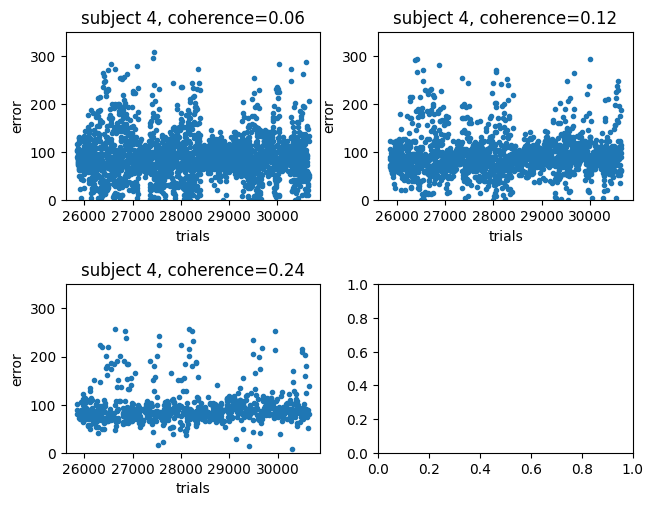

In [16]:
subject_id = 4
dff_s = dff[dff['subject_id'] == subject_id]
fig, axes = plt.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

for idx, coherence in enumerate(coherence_set):
    # plt.subplot(2,2,idx+1)
    axes[int(idx/2),int(idx%2)].plot(dff_s[dff_s['motion_coherence'] == coherence]['error'], 'o', markersize=3)
    axes[int(idx/2),int(idx%2)].set_xlabel('trials')
    axes[int(idx/2),int(idx%2)].set_ylabel('error')
    axes[int(idx/2),int(idx%2)].set_title(f'subject {subject_id}, coherence={coherence}')
    axes[int(idx/2),int(idx%2)].set_ylim(0, 350)

In [38]:
dff_q1 = dff[['subject_id','prior_std','motion_coherence','error']]

In [40]:
dff_q1[dff_q1['subject_id']==1].groupby(['subject_id','motion_coherence'])[['error']].agg(['mean', 'median', 'var'])

error                        
                                  mean     median          var
subject_id motion_coherence                                   
1          0.06              92.210235  88.117095  1685.399615
           0.12              95.148480  90.904977  1142.677384
           0.24              98.685399  92.074747   952.645350

In [36]:
dff_q1[dff_q1['subject_id']==1].groupby(['subject_id','motion_coherence','prior_std'])[['error']].agg(['mean', 'median', 'var'])

error                        
                                             mean     median          var
subject_id motion_coherence prior_std                                    
1          0.06             10          87.205969  87.175036   264.647868
                            20          85.835635  85.704705   490.552008
                            40          85.937908  85.636636   956.927414
                            80         100.760977  92.192682  3197.969220
           0.12             10          89.562527  89.455692   170.057281
                            20          89.688976  91.111796   307.374836
                            40          90.791672  90.364133   512.535857
                            80         102.778205  93.069965  2253.525447
           0.24             10          92.628916  92.535406    94.806273
                            20          91.560074  92.042269   118.536396
                            40          92.095639  91.031458   187.506218
                            80         107.291860  92.413861  1900.677405

In [ ]:
---

In [21]:
corr = dff_q1[['prior_std', 'motion_coherence', 'error']].corr(method='pearson')

In [22]:
print(corr)

                  prior_std  motion_coherence     error
prior_std          1.000000          0.017386  0.145556
motion_coherence   0.017386          1.000000  0.011956
error              0.145556          0.011956  1.000000


In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = dff_q1[['prior_std', 'motion_coherence']]
y = dff_q1[['error']]

model.fit(X, y)

model.coef_

model.intercept_

from sklearn.preprocessing import normalize

X_n = normalize(X, axis=0)

model_n = LinearRegression()

model_n.fit(X_n, y)

model_n.coef_

model_n.intercept_

ValueError: Input y contains NaN.

### Q2.Participants' estimation consistency improves over multiple sessions and runs.
1. Look at types of blocks between sessions (make the above figure for each sessions and see if the sessions are very different between types of blocks and number of blocks)
2. Calculate error (participant response - stimulus direction) throughout all blocks of each sessions
3. Compare this metric between sessions
4. If number/type of blocks between sessions are significantly different, then find a way to normalise this (maybe randomly sampled or fixed numbers of each blocks to be included???) and repeat the above analysis

In [105]:
dff_q2 = dff[['subject_id','trial_index','motion_coherence','prior_std','session_id','run_id','error']]

In [107]:
# each block
dff_q2[dff_q2['subject_id']==1].groupby(['subject_id','session_id','run_id','prior_std'])[['error']].agg(['mean', 'median', 'var']).reset_index()

subject_id session_id run_id prior_std       error                         
                                                 mean      median          var
0           1          1      1        10   94.176877   94.853535   126.522770
1           1          1      2        80  101.070916   92.236049  2295.911528
2           1          1      3        20   88.724954   90.583113   251.459028
3           1          1      4        40   91.066683   90.896354   637.628980
4           1          1      5        80  104.701824  102.347613  2235.149625
5           1          2      6        10   90.991985   91.729029   141.277990
6           1          2      7        20   87.475392   89.437198   382.320048
7           1          2      8        40   88.901045   90.269873   708.208074
8           1          2      9        80  102.393214   92.248464  2566.771048
9           1          2     10        80  100.508772   92.462555  1810.536932
10          1          3     11        80  103.907209   94.334101  2220.734698
11          1          3     12        10   90.459413   91.102548   136.907476
12          1          3     13        20   94.872676   94.960581   272.609414
13          1          3     14        40   92.995584   91.935224   531.030024
14          1          3     15        80  108.993055   98.711568  2428.211973
15          1          4     16        40   90.354341   90.700757   622.292950
16          1          4     17        80  104.322250   96.124991  2403.561517
17          1          4     18        10   84.979628   84.872030   151.982945
18          1          4     19        20   84.430225   84.872030   450.652372
19          1          4     20        80  101.260553   89.455692  2526.592776
20          1          5     21        20   91.804732   92.374004   347.469340
21          1          5     22        40   85.676516   87.370056   629.420971
22          1          5     23        10   90.516144   89.455692   203.042909
23          1          5     24        80  104.783371   94.459641  2401.707633
24          1          5     25        80  100.237474   90.700757  2334.956571
25          1          6     26        40   89.045131   88.786394   793.886153
26          1          6     27        80  102.789243   92.829212  2770.533283
27          1          6     28        20   84.997991   84.545277   327.457297
28          1          6     29        10   82.488088   81.461615   417.867655
29          1          6     30        80  102.859785   89.749498  3250.850648
30          1          7     31        20   86.306400   86.531458   587.214922
31          1          7     32        80   97.669830   86.749498  2661.512295
32          1          7     33        80  107.461880   94.541329  3854.725929
33          1          7     34        40   87.095087   85.070328   806.038103
34          1          7     35        10   87.883104   87.632888   194.487731
35          1          8     36        40   83.613158   84.578225   743.234462
36          1          8     37        80  101.951677   88.659913  3804.606496
37          1          8     38        20   85.415664   86.000485   307.834277
38          1          8     39        10   89.951577   89.383875   195.353043
39          1          8     40        80   96.278801   88.204705  2846.711593

### Q3.Shorter reaction times correlate with less accurate perceptual estimations
1. Calculate response times and error (participant response - stimulus direction) for each session/block/trial (?)
2. Correlate the above metrics
3. Consider splitting the data in coherence/prior types and then repeat the above analysis

In [113]:
dff_q3 = dff[['subject_id', 'trial_index', 'motion_coherence', 'reaction_time', 'prior_std', 'session_id', 'run_id', 'error']]

In [114]:
dff_q3[['reaction_time']]
# dff_q3.dropna(subset=['reaction_time'], inplace=True)

,reaction_time
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
83208,1.298565
83209,1.175129
83210,0.793728
83211,1.363531


In [115]:
dff_q3_1 = dff_q3[dff_q3['subject_id'] == 1]

In [116]:
dff_q3_1_sess1 = dff_q3[dff_q3['session_id'] == 1]

In [123]:
dff_q3_1_sess1[['reaction_time']].dropna(subset=['reaction_time'], inplace=True)

C:\Users\HIRA\AppData\Local\Temp\ipykernel_2636\1032933123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_q3_1_sess1[['reaction_time']].dropna(subset=['reaction_time'], inplace=True)


In [128]:
dff_q3_1_sess1.reset_index(inplace=True)

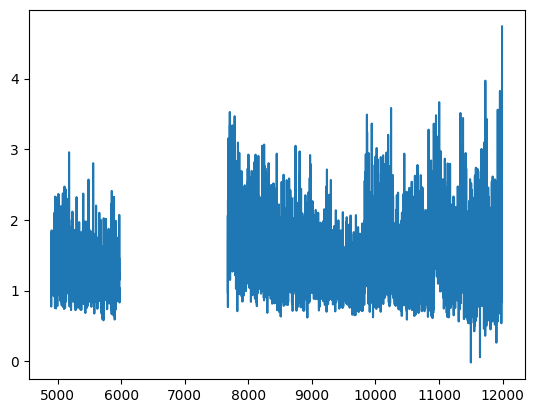

In [129]:
plt.plot(dff_q3_1_sess1[['reaction_time']])

In [ ]:
dff_q3[dff_q3['subject_id']==1].groupby(['subject_id','session_id','run_id','prior_std'])[['error']].agg(['mean', 'median', 'var']).reset_index()

In [109]:
dff_q3[['reaction_time']].

,reaction_time
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
83208,1.298565
83209,1.175129
83210,0.793728
83211,1.363531
